In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

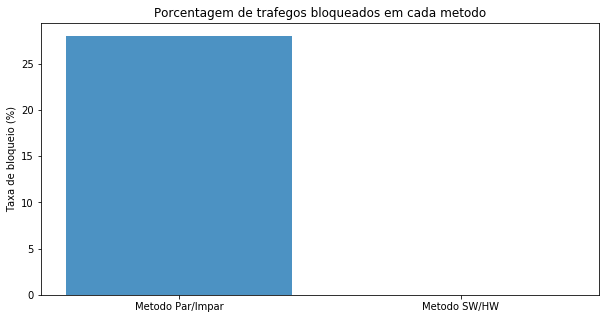

In [2]:
#df = pd.read_csv("iperf.csv", index_col = [1])
df = pd.read_csv("../Saidas/Teste6/teste6.csv")
#Remove colunas desnecessarias
del df['Timestamp']
del df['?']
del df['Tempo']

dfServer = df[df.IpOri == '10.1.0.1']
dfCliente = df[df.IpOri == '10.1.0.2']
#df = dfServer
#df = df.reset_index(drop=True)
del dfCliente['Jitter']
del dfCliente['PctPerdido']
del dfCliente['PctEnv']
del dfCliente['%Perda']
del dfCliente['ForaOrdem']

#Pegando informacoes para grafico de bloqueados (APENAS PARA O MODO DE PAR/IMPAR)
bloqueados = []

dfInfo = pd.read_csv("../Saidas/Teste6/iperfs.txt", sep="\t")
listaPortas = dfInfo['PCli'].tolist()
listaPortasServer = dfServer['PortaDest'].tolist()
for porta in listaPortas:
    if (porta not in listaPortasServer):
        bloqueados.append(porta)

taxaBloqueio = len(bloqueados)/float(len(listaPortas))*100

colunas = ('Metodo Par/Impar', 'Metodo SW/HW')
posicao = np.arange(len(colunas))
barras = [taxaBloqueio, 0]

plt.bar(posicao, barras, align='center', alpha=0.8)
plt.xticks(posicao, colunas)
plt.ylabel('Taxa de bloqueio (%)')
plt.title('Porcentagem de trafegos bloqueados em cada metodo')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

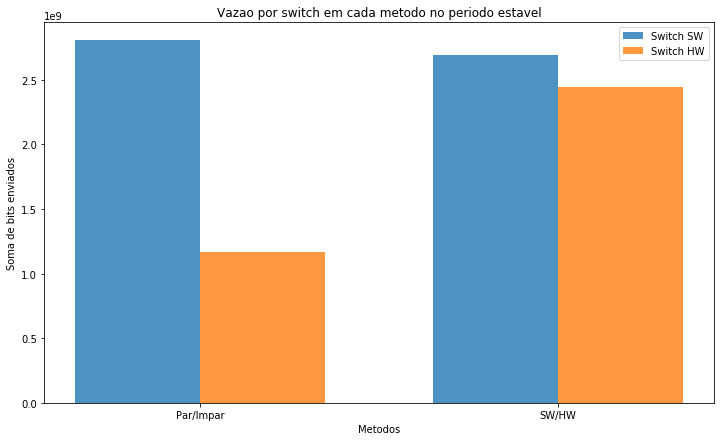

In [3]:
dfParImpar = pd.read_csv("../Saidas/Teste6/teste6.csv")
dfSWHW = pd.read_csv("../Saidas/Teste5/teste5.csv")
#Remove colunas desnecessarias
del dfParImpar['Timestamp']
del dfParImpar['?']
del dfParImpar['Tempo']
del dfSWHW['Timestamp']
del dfSWHW['?']
del dfSWHW['Tempo']

#Dividindo por metodo
dfServerParImpar = dfParImpar[dfParImpar.IpOri == '10.1.0.1']
dfServerSWHW = dfSWHW[dfSWHW.IpOri == '10.1.0.1']

#Pegando trafego no periodo estavel (150-250 segundos)
dfInfo = pd.read_csv("../Saidas/Teste6/iperfs.txt", sep="\t")
portasEstaveisPar = []
portasEstaveisImpar = []
for index, row in dfInfo.iterrows():
    if (row['Inicio(seg)'] >= 150 and row['Inicio(seg)'] <= 250):
        if(row['PCli'] %2 == 0):
            portasEstaveisPar.append(int(row['PCli']))
        else:
            portasEstaveisImpar.append(int(row['PCli']))
        
#Dividindo por switch em cada metodo
hwParImpar = dfParImpar[dfParImpar.PortaOri %2 == 0]
hwParImpar = hwParImpar[hwParImpar['PortaDest'].isin(portasEstaveisPar)]
swParImpar = dfParImpar[dfParImpar.PortaOri %2 != 0]
swParImpar = swParImpar[swParImpar['PortaDest'].isin(portasEstaveisImpar)]
hwSWHW = dfSWHW[dfSWHW.PortaOri %2 == 0]
hwSWHW = hwSWHW[hwSWHW['PortaDest'].isin(portasEstaveisPar)]
swSWHW = dfSWHW[dfSWHW.PortaOri %2 != 0]
swSWHW = swSWHW[swSWHW['PortaDest'].isin(portasEstaveisImpar)]

listaSW = [swParImpar['BitsEnv'].sum(), swSWHW['BitsEnv'].sum()]
listaHW = [hwParImpar['BitsEnv'].sum(), hwSWHW['BitsEnv'].sum()]

n_groups = 2
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, listaSW, bar_width, alpha=opacity, label='Switch SW')
rects2 = plt.bar(index + bar_width, listaHW, bar_width, alpha=opacity, label='Switch HW')

plt.xlabel('Metodos')
plt.ylabel('Soma de bits enviados')
plt.title('Vazao por switch em cada metodo no periodo estavel')
plt.xticks(index + bar_width/2, ('Par/Impar', 'SW/HW'))
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 7)
#fig.savefig('test2png.png', dpi=100)
#plt.tight_layout()
plt.show()

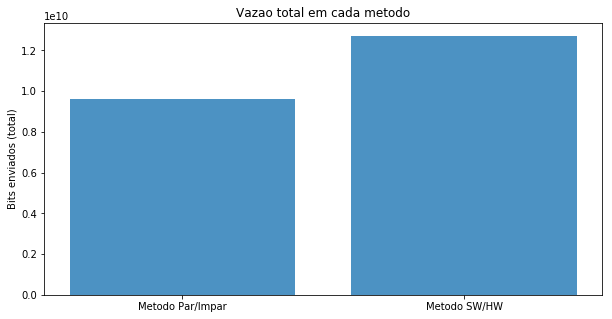

In [4]:
dfParImpar = pd.read_csv("../Saidas/Teste6/teste6.csv")
dfSWHW = pd.read_csv("../Saidas/Teste5/teste5.csv")
#Remove colunas desnecessarias
del dfParImpar['Timestamp']
del dfParImpar['?']
del dfParImpar['Tempo']
del dfSWHW['Timestamp']
del dfSWHW['?']
del dfSWHW['Tempo']

#Dividindo por metodo
dfServerParImpar = dfParImpar[dfParImpar.IpOri == '10.1.0.1']
dfServerSWHW = dfSWHW[dfSWHW.IpOri == '10.1.0.1']

colunas = ('Metodo Par/Impar', 'Metodo SW/HW')
posicao = np.arange(len(colunas))
barras = [dfServerParImpar['BitsEnv'].sum(), dfServerSWHW['BitsEnv'].sum()]

plt.bar(posicao, barras, align='center', alpha=0.8)
plt.xticks(posicao, colunas)
plt.ylabel('Bits enviados (total)')
plt.title('Vazao total em cada metodo')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()